In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
from skimage import io
from skimage.feature import match_template
from skimage.measure import label

import stitching

import time
import pandas as pd


In [3]:
def plot_img(img, cmap='gray'):
    plt.figure(figsize=(12,6))
    plt.imshow(img, cmap=cmap)
#     plt.axis('off')
    plt.show()

# Creating panorama using cv2.Stitcher

In [4]:
def create_panorama_cv2(photos:dict):
    """ Create panorama image, using Stitcher from OpenCV.
        photos - dict with directories as the keys
        and number of photos there as the values.
        Return result of the panorama creation and plot it in success case.
    """
    
    
    imgs_for_panorama = []
    cur_num_of_imgs = 0
    for key in photos.keys():
        print(key)
        
        for i in range(1, photos[key] + 1):
            img = np.float32(cv2.imread(key + str(i + cur_num_of_imgs) + ".jpg"))
            img = cv2.resize(img, (224, 224), interpolation = cv2.INTER_AREA)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            imgs_for_panorama.append(img.astype('uint8'))
        cur_num_of_imgs += photos[key]
    
    print("Image reading completed")
    
    resolution_arr = [240, 480, 720, 1080, 2048]
    
    metrics_df = pd.DataFrame(columns = ['time', 'success', 'image_names', 'image_resolution'])
    
    for resolution in resolution_arr:
        
        print(f"current resolution - {resolution}")
        stitchy = cv2.Stitcher.create() 

        algorithm_time_list = list()
        algorithm_success_list = list()
        image_names_list = list()
        image_resolution_list = list()

        imgs_for_stitching = [cv2.resize(imgs_for_panorama[0], (resolution, resolution), interpolation = cv2.INTER_AREA)]
        index_last_img_in_panorama = 1

        for i in range(1, len(imgs_for_panorama)):

            imgs_for_stitching.append(cv2.resize(imgs_for_panorama[i], (resolution, resolution), interpolation = cv2.INTER_AREA))

            start = time.time()
            flag_error= False
            try:
                result, panorama = stitchy.stitch(imgs_for_stitching)
            except: 
                flag_error = True
            finish = time.time()

            alorithm_time = finish - start

            if result != cv2.STITCHER_OK or flag_error == True: 
                print("stitching ain't successful") 
                algorithm_time_list.append(alorithm_time)
                algorithm_success_list.append(0)
                image_names_list.append((str(index_last_img_in_panorama)+'.jpg', str(i+1)+'.jpg'))
                image_resolution_list.append(resolution)
                imgs_for_stitching.pop()

            else:  
                print('Your Panorama is creaing!!!')
                algorithm_time_list.append(alorithm_time)
                algorithm_success_list.append(1)
                image_names_list.append((str(index_last_img_in_panorama)+'.jpg', str(i+1)+'.jpg'))
                image_resolution_list.append(resolution)
                imgs_for_stitching.pop()
                imgs_for_stitching[0] = panorama
                index_last_img_in_panorama = i+1

        plot_img(imgs_for_stitching[0])
        
        df = pd.DataFrame({'time': algorithm_time_list,
            'success': algorithm_success_list,
            'image_names': image_names_list,
            'image_resolution': image_resolution_list})
        metrics_df = metrics_df.append(df, ignore_index=True)

            
    return metrics_df

## Results

../../data/images_to_create_panorama/line1/position1/
../../data/images_to_create_panorama/line1/position2/
../../data/images_to_create_panorama/line1/position3/
Image reading completed
current resolution - 240
Your Panorama is creaing!!!
Your Panorama is creaing!!!
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful


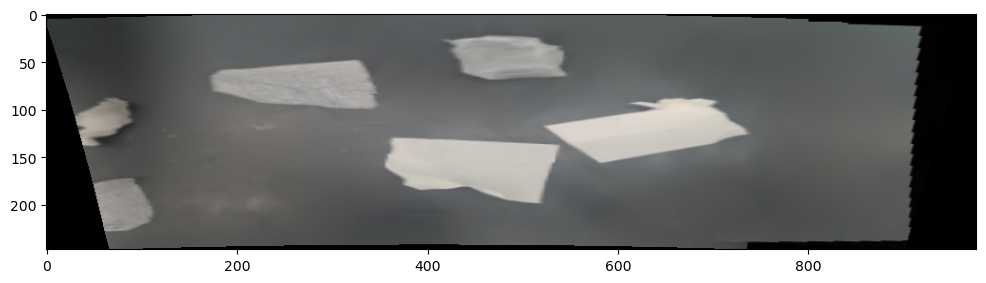

current resolution - 480
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful


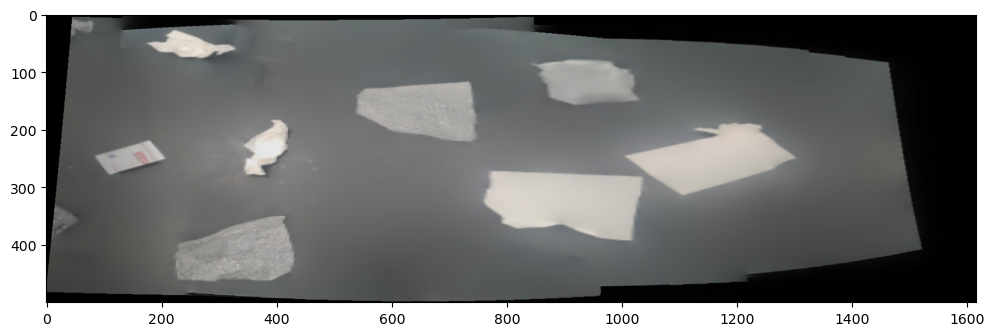

current resolution - 720
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful


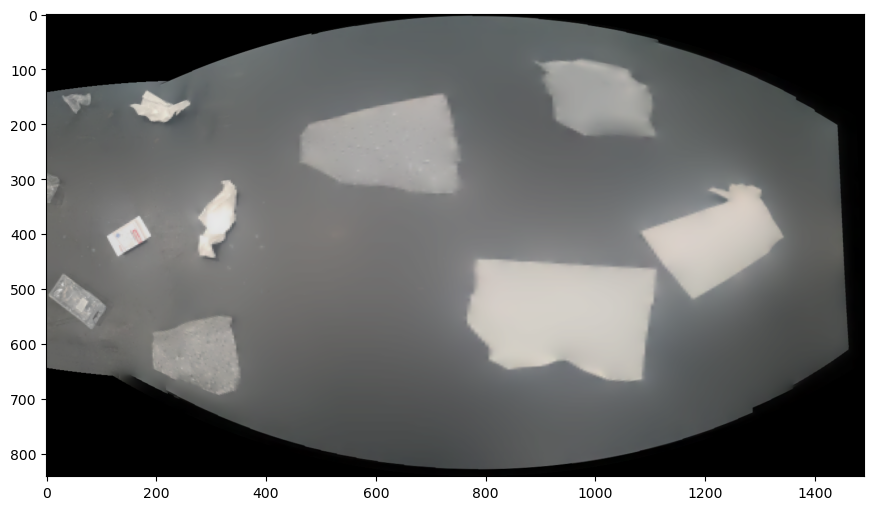

current resolution - 1080
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful


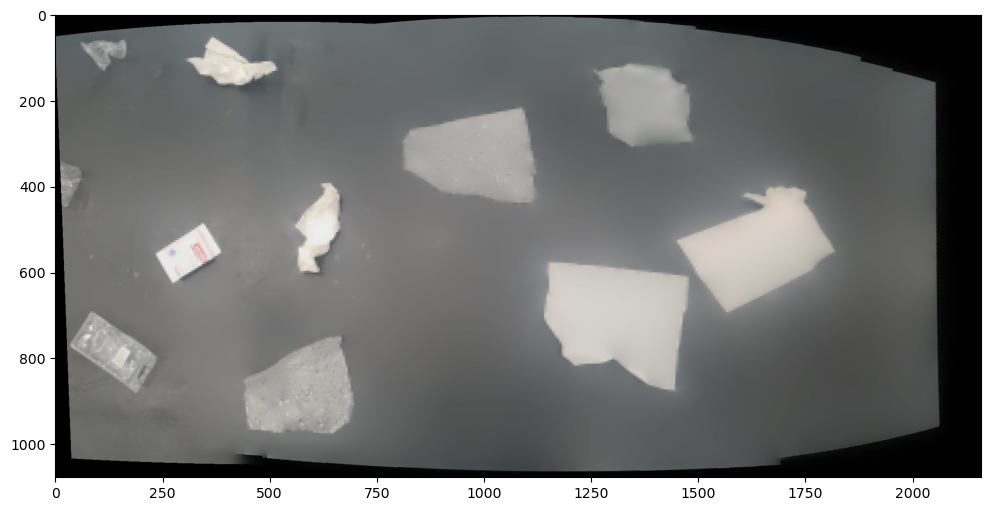

current resolution - 2048
Your Panorama is creaing!!!
Your Panorama is creaing!!!
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful


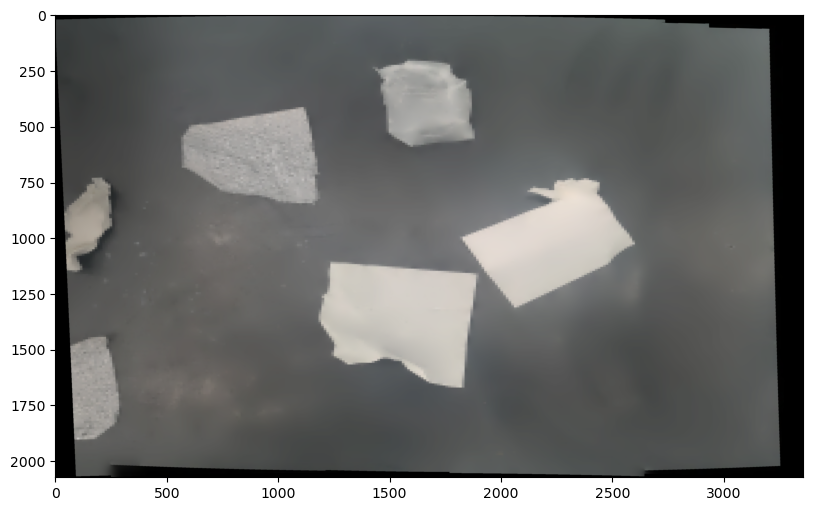

CPU times: total: 24.5 s
Wall time: 22.6 s


In [5]:
%%time
photos_line1 = {"../../data/images_to_create_panorama/line1/position1/" : 7,
                "../../data/images_to_create_panorama/line1/position2/" : 4,
                "../../data/images_to_create_panorama/line1/position3/" : 10}
metrics_df_line1 = create_panorama_cv2(photos_line1)
metrics_df_line1.to_csv('../../data/images_to_create_panorama/line1/results/metrics_df_line1_cv2_not_blured.csv') 

In [6]:
metrics_df_line1[metrics_df_line1.success==1]

time success     image_names image_resolution
0   1.830426       1  (1.jpg, 2.jpg)              240
1   0.577443       1  (2.jpg, 3.jpg)              240
20  0.267518       1  (1.jpg, 2.jpg)              480
21  0.180553       1  (2.jpg, 3.jpg)              480
22  0.506757       1  (3.jpg, 4.jpg)              480
23  0.194076       1  (4.jpg, 5.jpg)              480
24  0.537909       1  (5.jpg, 6.jpg)              480
40  0.325530       1  (1.jpg, 2.jpg)              720
41  0.455807       1  (2.jpg, 3.jpg)              720
42  0.244777       1  (3.jpg, 4.jpg)              720
43  0.238935       1  (4.jpg, 5.jpg)              720
44  0.489486       1  (5.jpg, 6.jpg)              720
45  0.169317       1  (6.jpg, 7.jpg)              720
60  0.388635       1  (1.jpg, 2.jpg)             1080
61  0.406566       1  (2.jpg, 3.jpg)             1080
62  0.468412       1  (3.jpg, 4.jpg)             1080
63  0.269297       1  (4.jpg, 5.jpg)             1080
64  0.586694       1  (5.jpg, 6.jpg)             1080
65  0.285291       1  (6.jpg, 7.jpg)             1080
80  0.581623       1  (1.jpg, 2.jpg)             2048
81  0.973125       1  (2.jpg, 3.jpg)             2048

../../data/images_to_create_panorama/line2/position1/
../../data/images_to_create_panorama/line2/position2/
../../data/images_to_create_panorama/line2/position3/
Image reading completed
current resolution - 240
Your Panorama is creaing!!!
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful


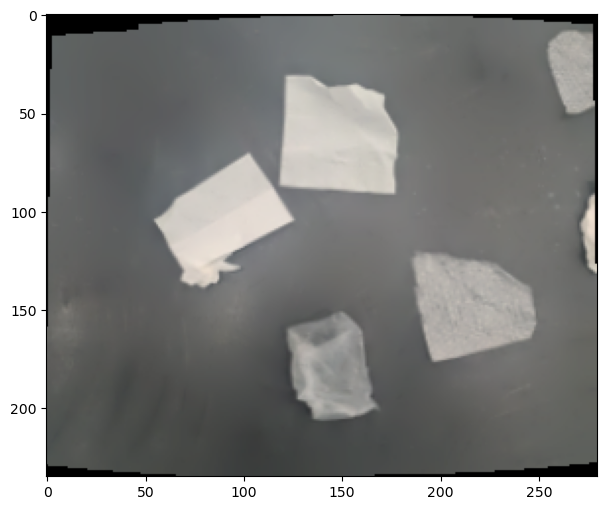

current resolution - 480
Your Panorama is creaing!!!
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful


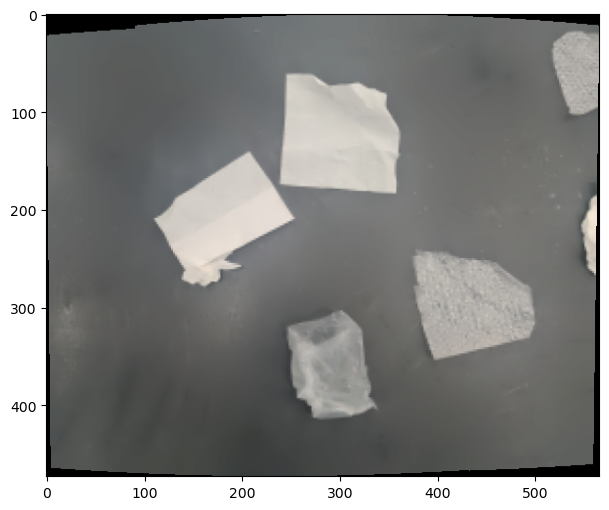

current resolution - 720
Your Panorama is creaing!!!
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful


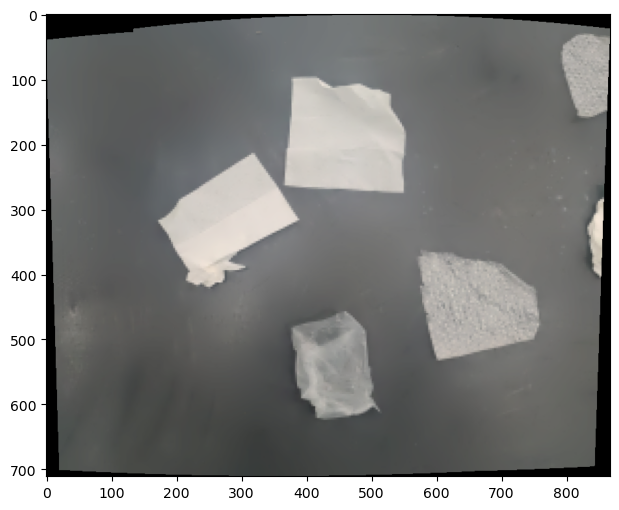

current resolution - 1080
Your Panorama is creaing!!!
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful


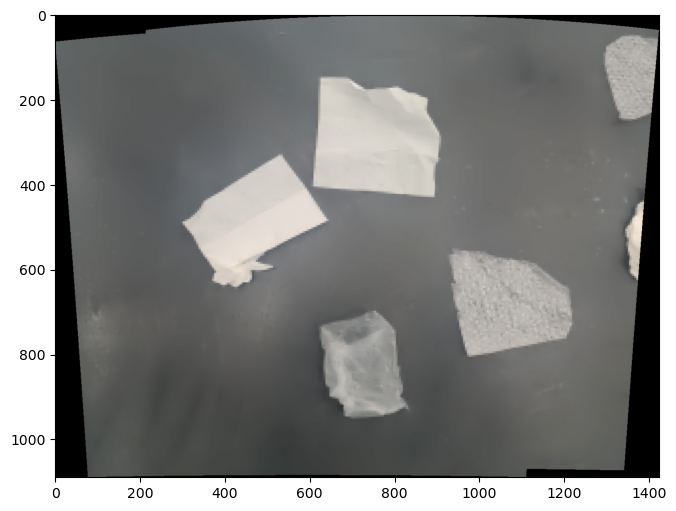

current resolution - 2048
Your Panorama is creaing!!!
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful


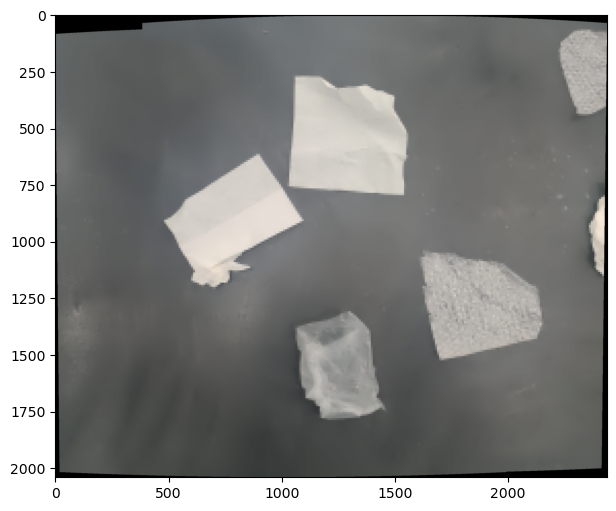

CPU times: total: 16.3 s
Wall time: 14 s


In [7]:
%%time
photos_line2 = {"../../data/images_to_create_panorama/line2/position1/" : 8,
                "../../data/images_to_create_panorama/line2/position2/" : 4,
                "../../data/images_to_create_panorama/line2/position3/" : 6}
metrics_df_line2 = create_panorama_cv2(photos_line2)
metrics_df_line2.to_csv('../../data/images_to_create_panorama/line2/results/metrics_df_line2_cv2_not_blured.csv') 

In [8]:
metrics_df_line2[metrics_df_line2.success==1]

time success     image_names image_resolution
0   0.181222       1  (1.jpg, 2.jpg)              240
17  0.325645       1  (1.jpg, 2.jpg)              480
34  0.368029       1  (1.jpg, 2.jpg)              720
51  0.535196       1  (1.jpg, 2.jpg)             1080
68  0.611024       1  (1.jpg, 2.jpg)             2048

../../data/images_to_create_panorama/line3/position1/
Image reading completed
current resolution - 240
Your Panorama is creaing!!!
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful


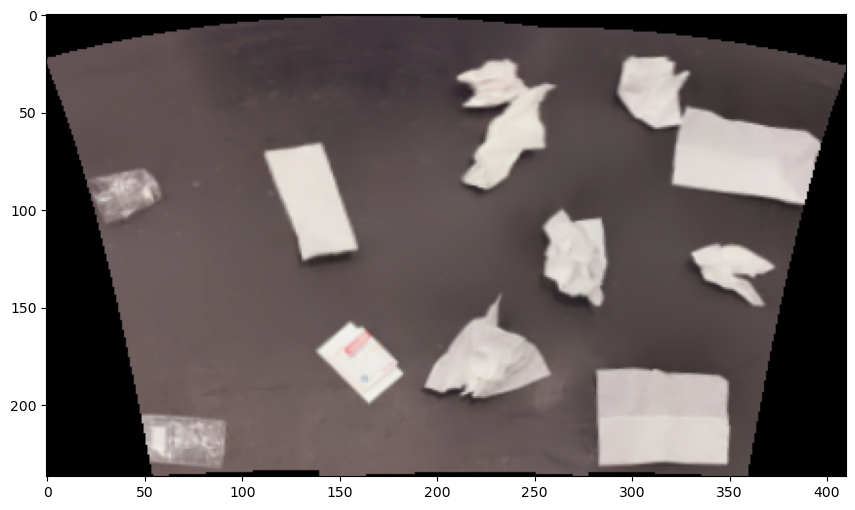

current resolution - 480
Your Panorama is creaing!!!
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful


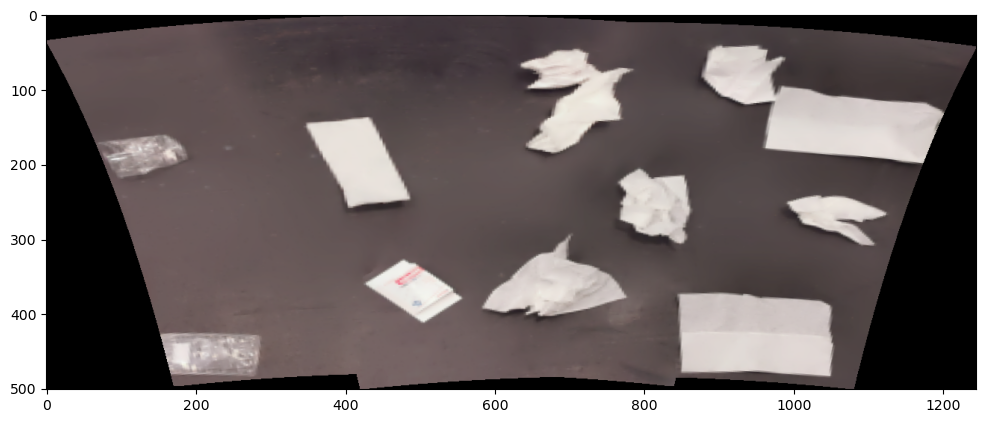

current resolution - 720
Your Panorama is creaing!!!
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful


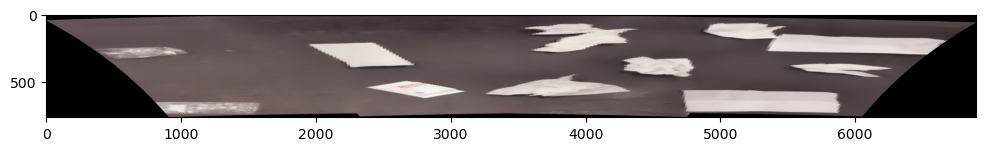

current resolution - 1080
Your Panorama is creaing!!!
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful


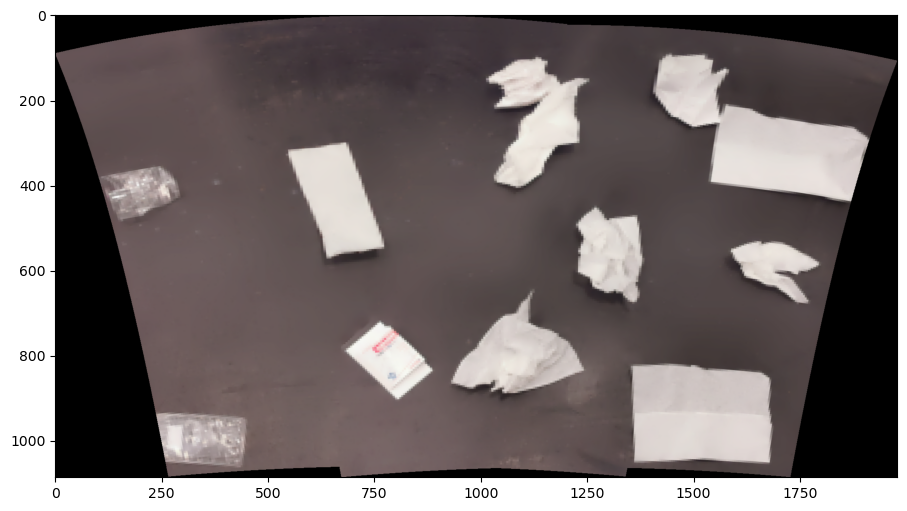

current resolution - 2048
Your Panorama is creaing!!!
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful


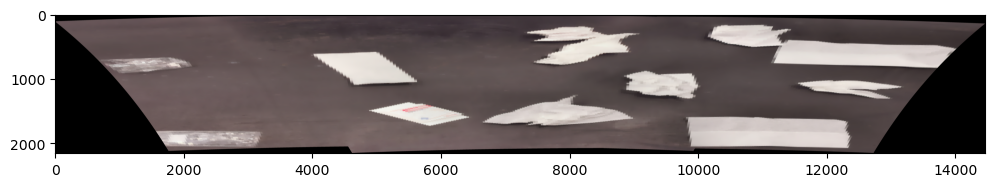

CPU times: total: 15.8 s
Wall time: 15.7 s


In [9]:
%%time
photos_line3 = {"../../data/images_to_create_panorama/line3/position1/" : 7}
metrics_df_line3 = create_panorama_cv2(photos_line3)
metrics_df_line3.to_csv('../../data/images_to_create_panorama/line3/results/metrics_df_line3_cv2_not_blured.csv') 

In [10]:
metrics_df_line3[metrics_df_line3.success==1]

time success     image_names image_resolution
0   0.152597       1  (1.jpg, 2.jpg)              240
6   0.651756       1  (1.jpg, 2.jpg)              480
12  3.464769       1  (1.jpg, 2.jpg)              720
18  0.457769       1  (1.jpg, 2.jpg)             1080
24  2.638140       1  (1.jpg, 2.jpg)             2048

## Creating panorama using https://github.com/lukasalexanderweber/stitching

In [11]:
def create_panorama_lukas(photos:dict):
    """ Create panorama image, using lukas's algorithms from github.
    photos - dict with directories as the keys
    and number of photos there as the values.
    Return result of the panorama creation and plot it in success case.
    """
    
    stitcher = stitching.Stitcher()
    imgs_names_for_panorama = []
    cur_num_of_imgs = 0
    
    for key in photos.keys():
        for i in range(1, photos[key] + 1):
            imgs_names_for_panorama.append(key+str(cur_num_of_imgs+i)+'.jpg')
        cur_num_of_imgs += photos[key]
    
    algorithm_time_list = list()
    algorithm_success_list = list()
    image_names_list = list()
    image_resolution_list = list()
    
#     imgs_names_for_panorama = imgs_names_for_panorama[::-1]
    
    panorama = imgs_names_for_panorama[0]
    
    img_0 = np.float32(cv2.imread(imgs_names_for_panorama[0]))
    img_0 = cv2.cvtColor(img_0, cv2.COLOR_BGR2RGB)          
    
    cv2.imwrite("../../data/images_to_create_panorama/results/panorama_lukas.jpg", img_0)
    
    imgs_for_stitching = ["../../data/images_to_create_panorama/results/panorama_lukas.jpg"]
    index_last_img_in_panorama = 1
    
    for i in range(1, len(imgs_names_for_panorama)):
        
        
        imgs_for_stitching.append(imgs_names_for_panorama[i])
        
        start = time.time()
        try: 
            panorama = stitcher.stitch(imgs_for_stitching)
            finish = time.time()

            alorithm_time = finish - start

            print('Your Panorama is creaing!!!')
            algorithm_time_list.append(alorithm_time)
            algorithm_success_list.append(1)
            image_names_list.append((str(index_last_img_in_panorama)+'.jpg', str(i+1)+'.jpg'))
            image_resolution_list.append(3024)
            
            cv2.imwrite("../../data/images_to_create_panorama/results/panorama_lukas.jpg", panorama)   
            imgs_for_stitching = ["../../data/images_to_create_panorama/results/panorama_lukas.jpg"]
            
            index_last_img_in_panorama = i+1
            
        except:
                
            finish = time.time()
            alorithm_time = finish - start
            
            print("stitching ain't successful") 
            algorithm_time_list.append(alorithm_time)
            algorithm_success_list.append(0)
            image_names_list.append((str(index_last_img_in_panorama)+'.jpg', str(i+1)+'.jpg'))
            image_resolution_list.append(3024)
            imgs_for_stitching.pop()
                       
            
            
    plot_img(cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB))
    
    metrics_df = pd.DataFrame({
    'time': algorithm_time_list,
    'success': algorithm_success_list,
    'image_names': image_names_list,
    'image_resolution': image_resolution_list
    })
    return metrics_df
    
    
    
    

## Results

Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful


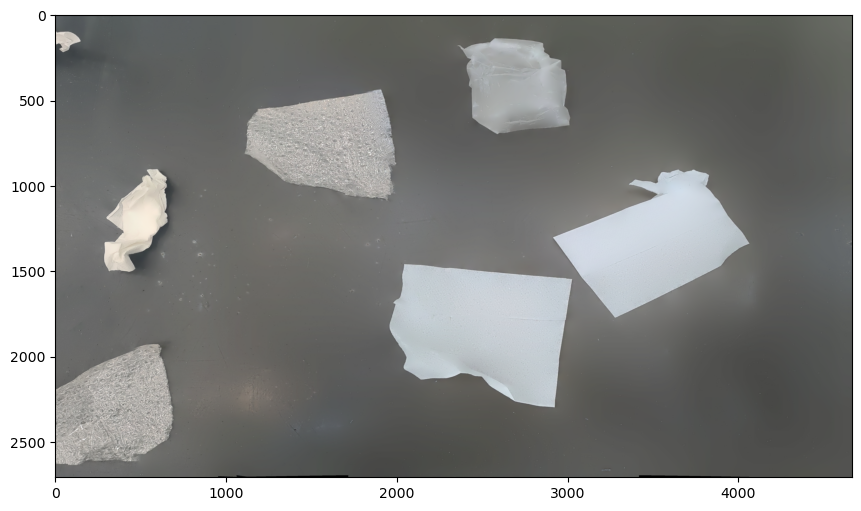

CPU times: total: 23.6 s
Wall time: 18.2 s


In [12]:
%%time
photos_line1 = {"../../data/images_to_create_panorama/line1/position1/" : 7,
                "../../data/images_to_create_panorama/line1/position2/" : 4, 
                "../../data/images_to_create_panorama/line1/position3/" : 10}
metrics_df_line1 = create_panorama_lukas(photos_line1)
metrics_df_line1.to_csv('../../data/images_to_create_panorama/line1/results/metrics_df_line1_lukas_not_blured.csv') 

In [13]:
metrics_df_line1

time  success      image_names  image_resolution
0   6.195893        1   (1.jpg, 2.jpg)              3024
1   1.716856        1   (2.jpg, 3.jpg)              3024
2   2.252490        1   (3.jpg, 4.jpg)              3024
3   0.334565        0   (4.jpg, 5.jpg)              3024
4   0.337784        0   (4.jpg, 6.jpg)              3024
5   0.319380        0   (4.jpg, 7.jpg)              3024
6   0.326041        0   (4.jpg, 8.jpg)              3024
7   0.347110        0   (4.jpg, 9.jpg)              3024
8   0.326009        0  (4.jpg, 10.jpg)              3024
9   0.331509        0  (4.jpg, 11.jpg)              3024
10  0.332249        0  (4.jpg, 12.jpg)              3024
11  0.310397        0  (4.jpg, 13.jpg)              3024
12  0.357183        0  (4.jpg, 14.jpg)              3024
13  0.326171        0  (4.jpg, 15.jpg)              3024
14  0.332288        0  (4.jpg, 16.jpg)              3024
15  0.339759        0  (4.jpg, 17.jpg)              3024
16  0.319317        0  (4.jpg, 18.jpg)              3024
17  0.336763        0  (4.jpg, 19.jpg)              3024
18  0.316712        0  (4.jpg, 20.jpg)              3024
19  0.317302        0  (4.jpg, 21.jpg)              3024

Your Panorama is creaing!!!
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful


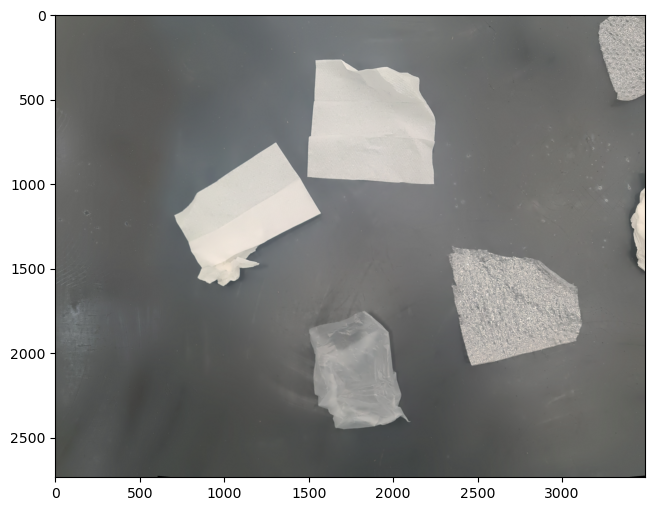

CPU times: total: 11.1 s
Wall time: 8.35 s


In [14]:
%%time
photos_line2 = {"../../data/images_to_create_panorama/line2/position1/" : 8,
                "../../data/images_to_create_panorama/line2/position2/" : 4,
                "../../data/images_to_create_panorama/line2/position3/" : 6}
metrics_df_line2 = create_panorama_lukas(photos_line2)
metrics_df_line2.to_csv('../../data/images_to_create_panorama/line2/results/metrics_df_line2_lukas_not_blured.csv') 

In [15]:
metrics_df_line2

time  success      image_names  image_resolution
0   1.661211        1   (1.jpg, 2.jpg)              3024
1   0.294227        0   (2.jpg, 3.jpg)              3024
2   0.316180        0   (2.jpg, 4.jpg)              3024
3   0.285311        0   (2.jpg, 5.jpg)              3024
4   0.292351        0   (2.jpg, 6.jpg)              3024
5   0.314679        0   (2.jpg, 7.jpg)              3024
6   0.290573        0   (2.jpg, 8.jpg)              3024
7   0.300494        0   (2.jpg, 9.jpg)              3024
8   0.299429        0  (2.jpg, 10.jpg)              3024
9   0.300549        0  (2.jpg, 11.jpg)              3024
10  0.307727        0  (2.jpg, 12.jpg)              3024
11  0.298076        0  (2.jpg, 13.jpg)              3024
12  0.313098        0  (2.jpg, 14.jpg)              3024
13  0.334913        0  (2.jpg, 15.jpg)              3024
14  0.344827        0  (2.jpg, 16.jpg)              3024
15  0.292176        0  (2.jpg, 17.jpg)              3024
16  0.297564        0  (2.jpg, 18.jpg)              3024

Your Panorama is creaing!!!
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful
stitching ain't successful


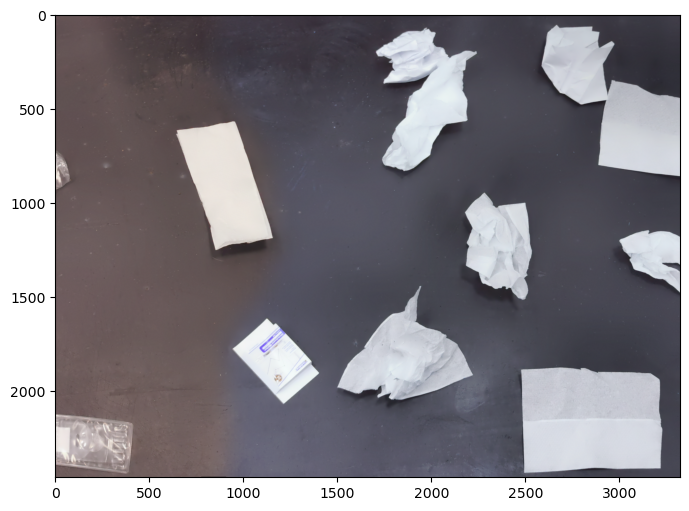

CPU times: total: 7.64 s
Wall time: 4.42 s


In [16]:
%%time
photos_line3 = {"../../data/images_to_create_panorama/line3/position1/" : 7}
metrics_df_line3 = create_panorama_lukas(photos_line3)
metrics_df_line3.to_csv('../../data/images_to_create_panorama/line3/results/metrics_df_line3_lukas_not_blured.csv') 

In [17]:
metrics_df_line3

time  success     image_names  image_resolution
0  1.527256        1  (1.jpg, 2.jpg)              3024
1  0.240375        0  (2.jpg, 3.jpg)              3024
2  0.260733        0  (2.jpg, 4.jpg)              3024
3  0.253890        0  (2.jpg, 5.jpg)              3024
4  0.248959        0  (2.jpg, 6.jpg)              3024
5  0.231477        0  (2.jpg, 7.jpg)              3024

# Creating panorama using the built-in methods from cv2

In [18]:
def trim(frame):
        #crop top
        if not np.sum(frame[0]):
            return trim(frame[1:])
        #crop top
        if not np.sum(frame[-1]):
            return trim(frame[:-2])
        #crop top
        if not np.sum(frame[:,0]):
            return trim(frame[:,1:])
        #crop top
        if not np.sum(frame[:,-1]):
            return trim(frame[:,:-2])
        return frame

In [19]:
def match_two_images(img1, img2, resolution):
    
    img1_orig = img1.copy()
    img2_orig = img2.copy()  
    
    img1 = cv2.resize(img1, (resolution, resolution), interpolation = cv2.INTER_AREA)
    img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    img2 = cv2.resize(img2, (resolution, resolution), interpolation = cv2.INTER_AREA)
    img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

    sift = cv2.SIFT_create()
    # find the key points and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)
    
#     plot_img(cv2.drawKeypoints(img1,kp1,None))

    match = cv2.BFMatcher()
    matches = match.knnMatch(des1,des2,k=2)
    
    good = []
    for m,n in matches:
        if m.distance < 0.5*n.distance:
            good.append(m)
    
    draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   flags = 2)

#     img3 = cv2.drawMatches(img_,kp1,img,kp2,good,None,**draw_params)
#     plot_img(img3)
    
    MIN_MATCH_COUNT = 10
    if len(good) > MIN_MATCH_COUNT:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

        h,w = img1.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts, M)
        img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
        #cv2.imshow("original_image_overlapping.jpg", img2)
    else:
        print("Not enought matches are found -", (len(good)))

    dst = cv2.warpPerspective(img1_orig,M,(img2_orig.shape[1] + img1_orig.shape[1], img2_orig.shape[0]))
    dst[0:img2_orig.shape[0],0:img2_orig.shape[1]] = img2_orig
#     plot_img(dst)

#     plot_img(trim(dst))
    return trim(dst)
    


In [20]:
def create_panorama_complex_algorithm(photos:dict):
    
    """ Create panorama image, using complex of methods from cv2
    photos - dict with directories as the keys
    and number of photos there as the values.
    Return result of the panorama creation and plot it in success case.
    """
    
    
    imgs_for_panorama = []
    cur_num_of_imgs = 0
    for key in photos.keys():
        print(key)
        
        for i in range(1, photos[key] + 1):
            img = np.float32(cv2.imread(key + str(i + cur_num_of_imgs) + ".jpg"))
            img = cv2.resize(img, (224, 224), interpolation = cv2.INTER_AREA)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            imgs_for_panorama.append(img.astype('uint8'))
        cur_num_of_imgs += photos[key]
    
    print("Image reading completed")
    
    resolution_arr = [240, 480, 720, 1080, 2048]
    
    metrics_df = pd.DataFrame(columns = ['time', 'success', 'image_names', 'image_resolution'])
    
    for resolution in resolution_arr:
        
        print(f"current resolution - {resolution}")

        algorithm_time_list = list()
        algorithm_success_list = list()
        image_names_list = list()
        image_resolution_list = list()

        imgs_for_stitching = [cv2.resize(imgs_for_panorama[0], (resolution, resolution), interpolation = cv2.INTER_AREA)]
        index_last_img_in_panorama = 1

        for i in range(1, len(imgs_for_panorama)):

            imgs_for_stitching.append(cv2.resize(imgs_for_panorama[i], (resolution, resolution), interpolation = cv2.INTER_AREA))

            flag_error = False
            start = time.time()
            try:
                panorama = match_two_images(imgs_for_stitching[0], imgs_for_stitching[1], resolution)
            except:
                flag_error = True
            finish = time.time()

            alorithm_time = finish - start

            if flag_error == True: 
                print("stitching ain't successful") 
                algorithm_time_list.append(alorithm_time)
                algorithm_success_list.append(0)
                image_names_list.append((str(index_last_img_in_panorama)+'.jpg', str(i+1)+'.jpg'))
                image_resolution_list.append(resolution)
                imgs_for_stitching.pop()

            else:  
                print('Your Panorama is creaing!!!')
                algorithm_time_list.append(alorithm_time)
                algorithm_success_list.append(1)
                image_names_list.append((str(index_last_img_in_panorama)+'.jpg', str(i+1)+'.jpg'))
                image_resolution_list.append(resolution)
                imgs_for_stitching.pop()
                imgs_for_stitching[0] = panorama
                index_last_img_in_panorama = i+1

        plot_img(imgs_for_stitching[0])
        
        df = pd.DataFrame({'time': algorithm_time_list,
            'success': algorithm_success_list,
            'image_names': image_names_list,
            'image_resolution': image_resolution_list})
        metrics_df = metrics_df.append(df, ignore_index=True)

            
    return metrics_df

## Results

../../data/images_to_create_panorama/line1/position1/
../../data/images_to_create_panorama/line1/position2/
../../data/images_to_create_panorama/line1/position3/
Image reading completed
current resolution - 240
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Not enought matches are found - 9
stitching ain't successful
Not enought matches are found - 2
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
N

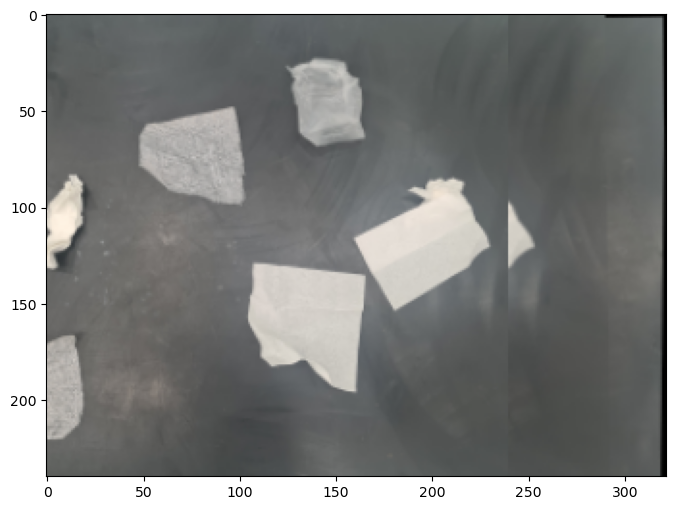

current resolution - 480
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 2
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 2
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 0
sti

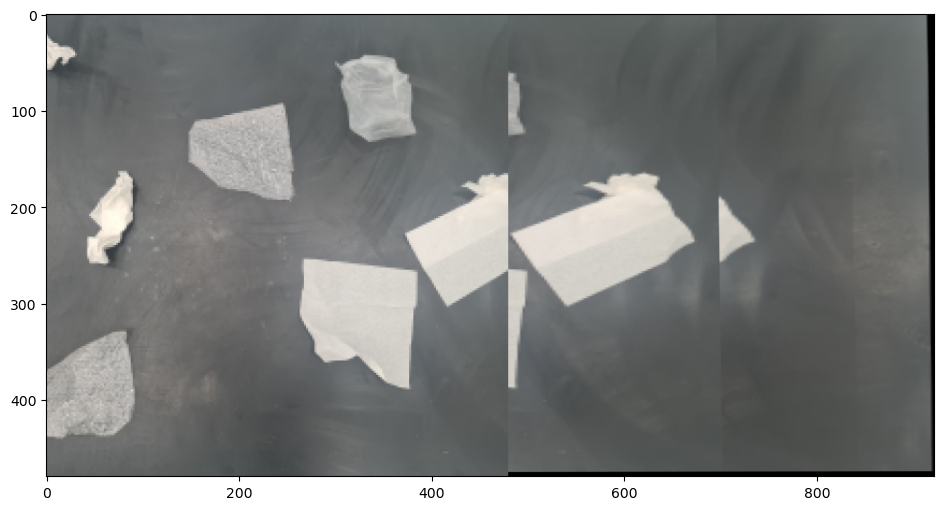

current resolution - 720
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 2
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 2
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 2
sti

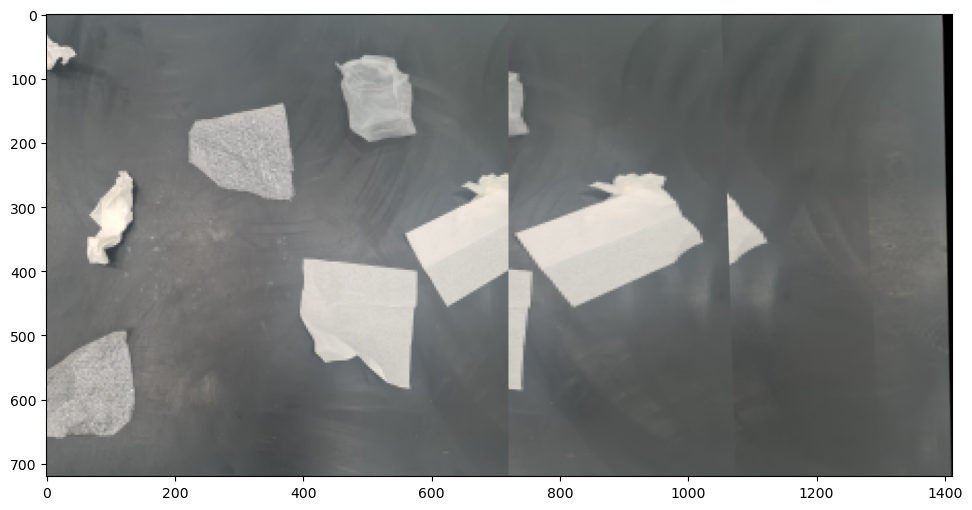

current resolution - 1080
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 2
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
st

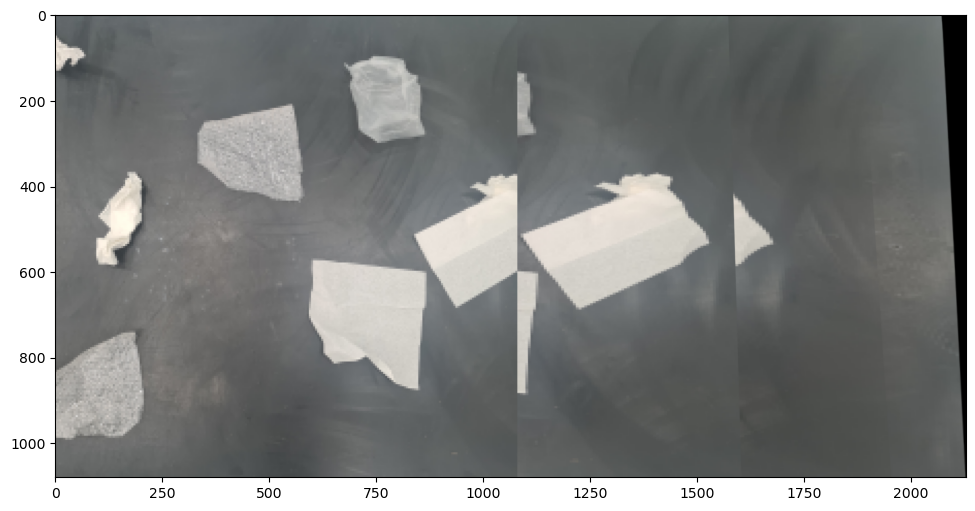

current resolution - 2048
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 2
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 2
stitching ain't successful
Not enought matches are found - 2
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 2
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 3
stitching ain't successful
Not enought matches are found - 2
st

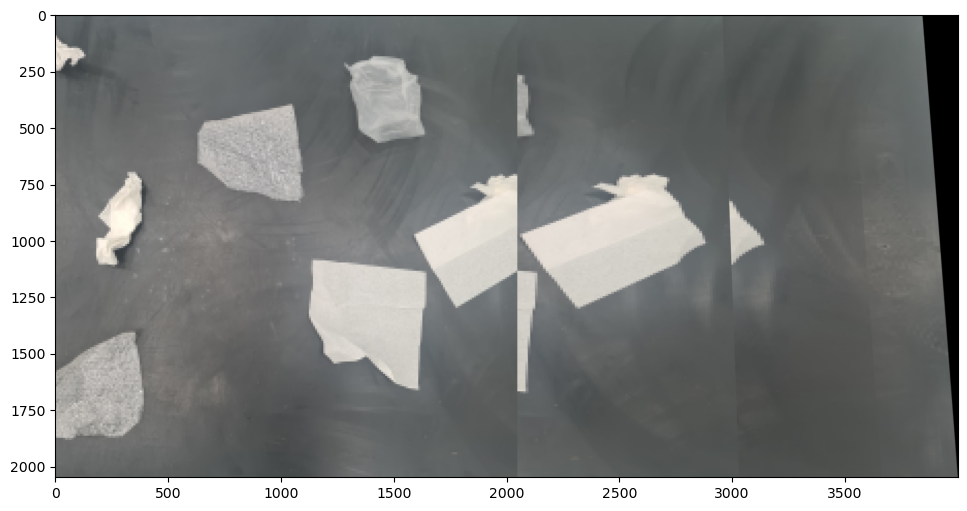

CPU times: total: 1min 54s
Wall time: 56.5 s


In [21]:
%%time
photos_line1 = {"../../data/images_to_create_panorama/line1/position1/" : 7,
                "../../data/images_to_create_panorama/line1/position2/" : 4,
                "../../data/images_to_create_panorama/line1/position3/" : 10}
metrics_df_line1 = create_panorama_complex_algorithm(photos_line1)
metrics_df_line1.to_csv('../../data/images_to_create_panorama/line1/results/metrics_df_line1_complex_algorithm_not_blured.csv') 

In [22]:
metrics_df_line1

time success      image_names image_resolution
0   0.040014       1   (1.jpg, 2.jpg)              240
1   0.040004       1   (2.jpg, 3.jpg)              240
2   0.039983       0   (3.jpg, 4.jpg)              240
3   0.032001       0   (3.jpg, 5.jpg)              240
4   0.032030       0   (3.jpg, 6.jpg)              240
..       ...     ...              ...              ...
95  1.562255       0  (4.jpg, 17.jpg)             2048
96  1.589309       0  (4.jpg, 18.jpg)             2048
97  1.576077       0  (4.jpg, 19.jpg)             2048
98  1.567035       0  (4.jpg, 20.jpg)             2048
99  1.636794       0  (4.jpg, 21.jpg)             2048

[100 rows x 4 columns]

../../data/images_to_create_panorama/line2/position1/
../../data/images_to_create_panorama/line2/position2/
../../data/images_to_create_panorama/line2/position3/
Image reading completed
current resolution - 240
Your Panorama is creaing!!!
Not enought matches are found - 5
stitching ain't successful
Not enought matches are found - 3
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 2
stitching ain't successful
Not enought matches are found

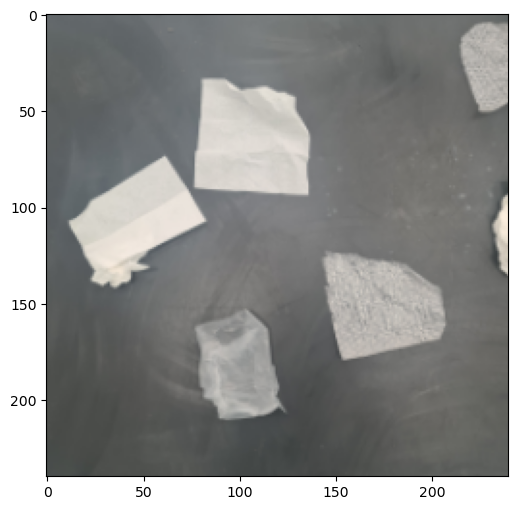

current resolution - 480
Your Panorama is creaing!!!
Not enought matches are found - 5
stitching ain't successful
Not enought matches are found - 4
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 3
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 2
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 

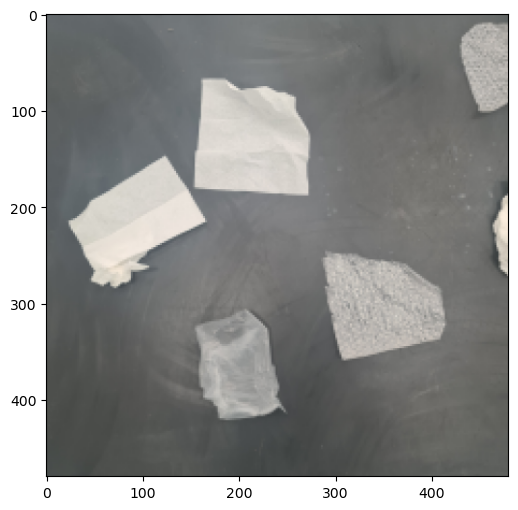

current resolution - 720
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Not enought matches are found - 9
stitching ain't successful
Not enought matches are found - 3
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful


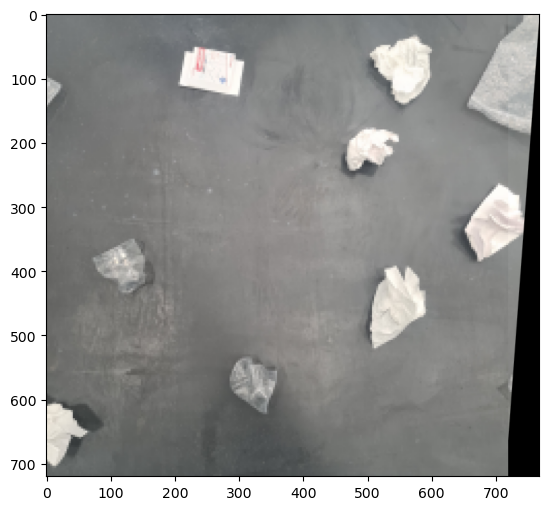

current resolution - 1080
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Not enought matches are found - 10
stitching ain't successful
Not enought matches are found - 6
stitching ain't successful
Not enought matches are found - 10
stitching ain't successful
Not enought matches are found - 8
stitching ain't successful
Not enought matches are found - 8
stitching ain't successful


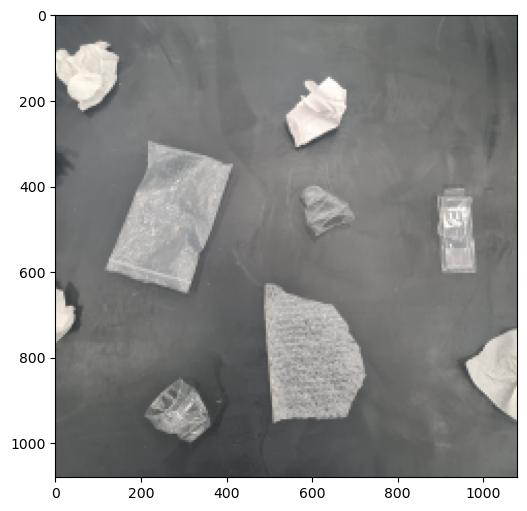

current resolution - 2048
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 2
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 2
stitching ain't successful
Not enought matches are found - 3
stitching ain't successful
Not enought matches are found - 5
stitching ain't successful


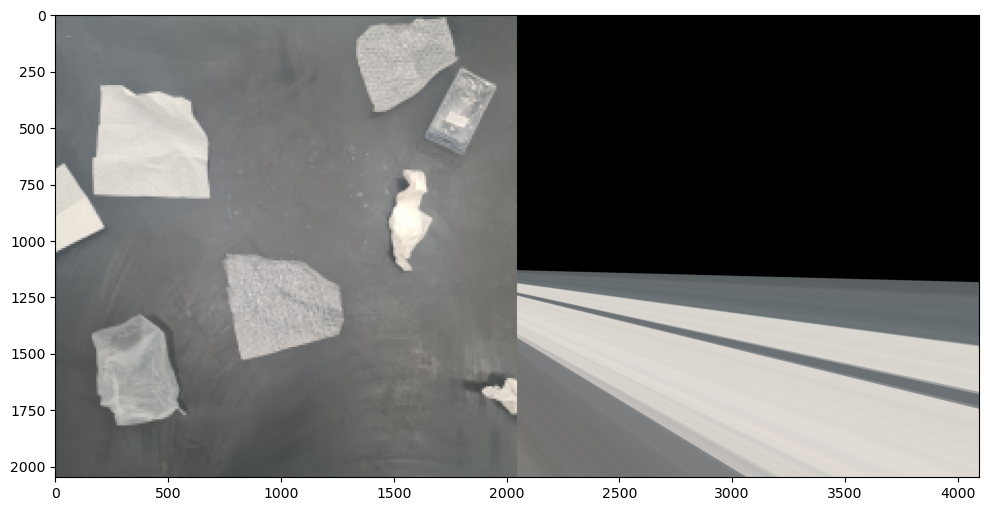

CPU times: total: 1min 39s
Wall time: 47.9 s


In [23]:
%%time
photos_line2 = {"../../data/images_to_create_panorama/line2/position1/" : 8,
                "../../data/images_to_create_panorama/line2/position2/" : 4,
                "../../data/images_to_create_panorama/line2/position3/" : 6}
metrics_df_line2 = create_panorama_complex_algorithm(photos_line2)
metrics_df_line2.to_csv('../../data/images_to_create_panorama/line2/results/metrics_df_line2_complex_algorithm_not_blured.csv') 

In [24]:
metrics_df_line2

time success      image_names image_resolution
0   0.041984       1   (1.jpg, 2.jpg)              240
1   0.024015       0   (2.jpg, 3.jpg)              240
2   0.031962       0   (2.jpg, 4.jpg)              240
3   0.031998       0   (2.jpg, 5.jpg)              240
4   0.032002       0   (2.jpg, 6.jpg)              240
..       ...     ...              ...              ...
80  1.802819       0  (3.jpg, 14.jpg)             2048
81  1.548221       0  (3.jpg, 15.jpg)             2048
82  1.692442       0  (3.jpg, 16.jpg)             2048
83  1.674242       0  (3.jpg, 17.jpg)             2048
84  1.655339       0  (3.jpg, 18.jpg)             2048

[85 rows x 4 columns]

../../data/images_to_create_panorama/line3/position1/
Image reading completed
current resolution - 240
Your Panorama is creaing!!!
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful


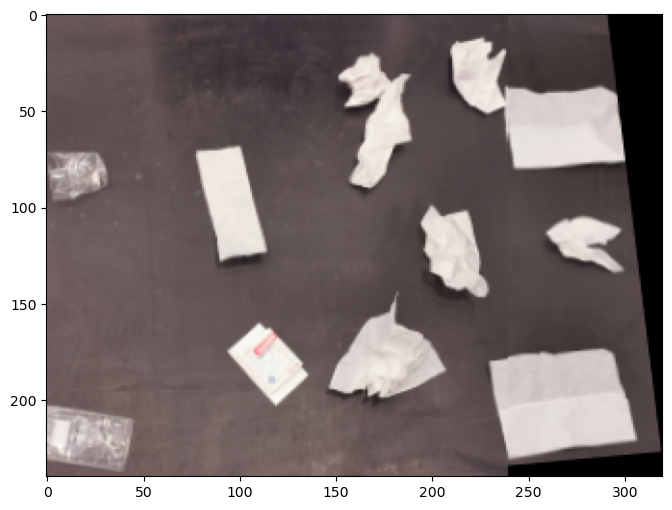

current resolution - 480
Your Panorama is creaing!!!
Not enought matches are found - 2
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful


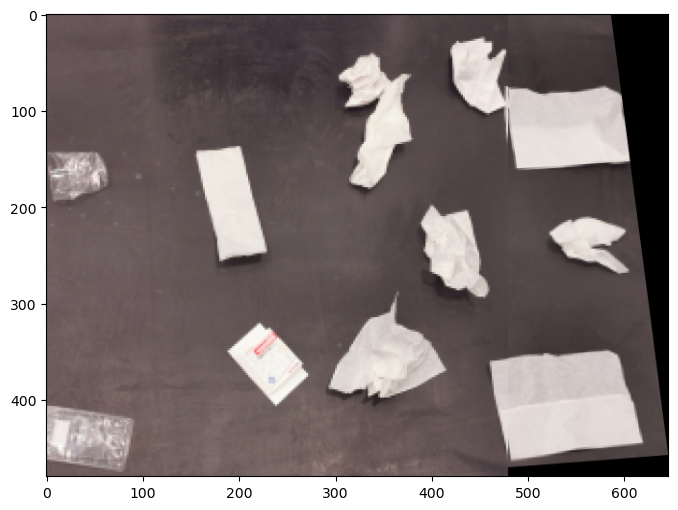

current resolution - 720
Your Panorama is creaing!!!
Not enought matches are found - 5
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful


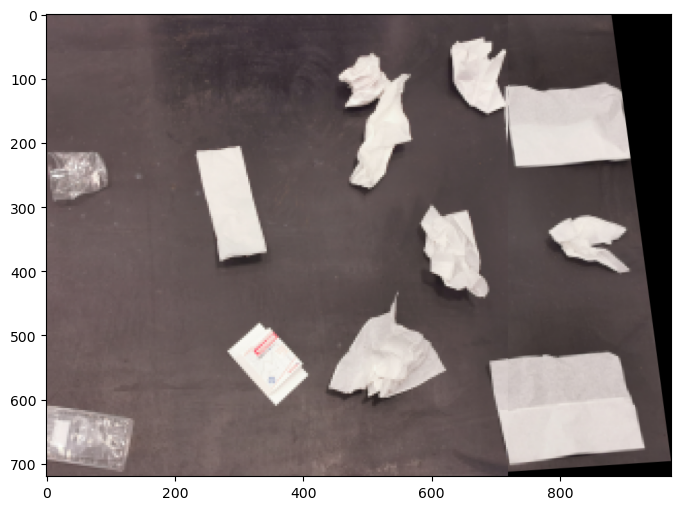

current resolution - 1080
Your Panorama is creaing!!!
Not enought matches are found - 6
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 3
stitching ain't successful


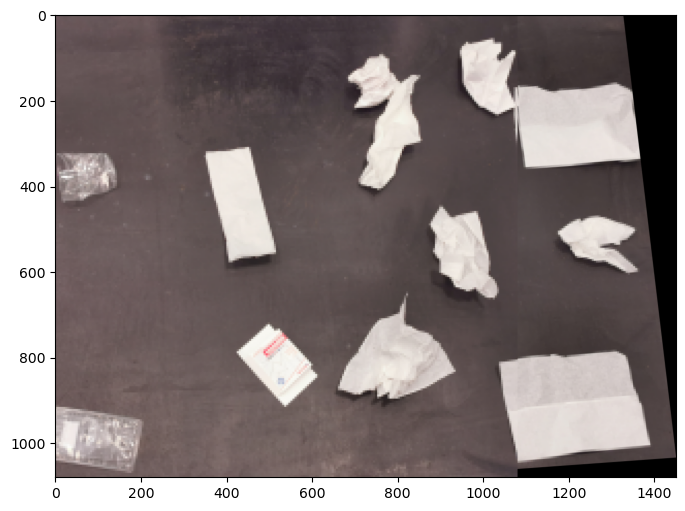

current resolution - 2048
Your Panorama is creaing!!!
Your Panorama is creaing!!!
Not enought matches are found - 3
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful
Not enought matches are found - 1
stitching ain't successful
Not enought matches are found - 0
stitching ain't successful


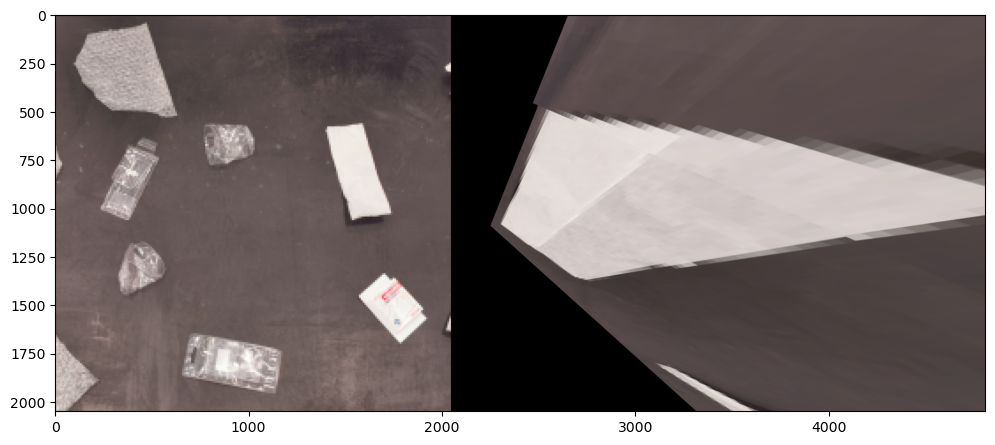

CPU times: total: 42.5 s
Wall time: 19.8 s


In [25]:
%%time
photos_line3 = {"../../data/images_to_create_panorama/line3/position1/" : 7}
metrics_df_line3 = create_panorama_complex_algorithm(photos_line3)
metrics_df_line3.to_csv('../../data/images_to_create_panorama/line3/results/metrics_df_line3_complex_algorithm_not_blured.csv') 

In [26]:
metrics_df_line3

time success     image_names image_resolution
0   0.040401       1  (1.jpg, 2.jpg)              240
1   0.024002       0  (2.jpg, 3.jpg)              240
2   0.031866       0  (2.jpg, 4.jpg)              240
3   0.024137       0  (2.jpg, 5.jpg)              240
4   0.031303       0  (2.jpg, 6.jpg)              240
5   0.015586       0  (2.jpg, 7.jpg)              240
6   0.090543       1  (1.jpg, 2.jpg)              480
7   0.106615       0  (2.jpg, 3.jpg)              480
8   0.111785       0  (2.jpg, 4.jpg)              480
9   0.093436       0  (2.jpg, 5.jpg)              480
10  0.096494       0  (2.jpg, 6.jpg)              480
11  0.111966       0  (2.jpg, 7.jpg)              480
12  0.218925       1  (1.jpg, 2.jpg)              720
13  0.235698       0  (2.jpg, 3.jpg)              720
14  0.205869       0  (2.jpg, 4.jpg)              720
15  0.215741       0  (2.jpg, 5.jpg)              720
16  0.205195       0  (2.jpg, 6.jpg)              720
17  0.220711       0  (2.jpg, 7.jpg)              720
18  0.500795       1  (1.jpg, 2.jpg)             1080
19  0.441859       0  (2.jpg, 3.jpg)             1080
20  0.438861       0  (2.jpg, 4.jpg)             1080
21  0.482631       0  (2.jpg, 5.jpg)             1080
22  0.456004       0  (2.jpg, 6.jpg)             1080
23  0.465735       0  (2.jpg, 7.jpg)             1080
24  1.969528       1  (1.jpg, 2.jpg)             2048
25  1.930980       1  (2.jpg, 3.jpg)             2048
26  1.743880       0  (3.jpg, 4.jpg)             2048
27  1.762531       0  (3.jpg, 5.jpg)             2048
28  1.768927       0  (3.jpg, 6.jpg)             2048
29  1.590116       0  (3.jpg, 7.jpg)             2048